<h1 style='text-align: center'>A simple face detection system  </h1>

We will build a simple face detection system. It is an artificial intelligence (AI)  used to find faces in digital images.

# 1. Import libraries

In [1]:
import numpy as np # computation and processing of the  multi-dimensional arrays and matrices
import matplotlib.pyplot as plt # data visualization.
import cv2 # computer vision 
import os #  interacting with the operating system. 

# 2. Dataset

I used photos generated by an AI on this website: <a href='https://thispersondoesnotexist.com/'>thispersondoesnotexist </a>

You can replace these photos with those of your choice. You can also add your own photo.

In [2]:
# Define a function to generate a dataset
def generate_dataset(folder_name='images'):

  dataset={}

  try:
        
    for image_name  in  os.listdir(folder_name):
      person_name = image_name.split('.')[0]
      image_path = os.path.join(folder_name , image_name)
      image = cv2.imread(image_path)
      dataset[person_name] = image
        
  except Exception as e:
      print(e)

  return dataset  

In [3]:
dataset = generate_dataset()

In [4]:
# define a helper function to plot images
def display_images(dataset , how='normal'):
    
  if how =='normal':
    print('Normal display')
    for name, image in dataset.items():
      image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      plt.figure(figsize=(8,8))
      plt.imshow(image)
      plt.show()

  else:
    print('Gray display')     
    for name, image in dataset.items():
      plt.figure(figsize=(8,8))
      plt.imshow(image ,'gray')
      plt.show()

Normal display


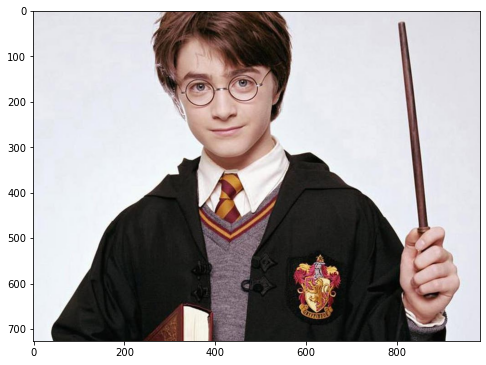

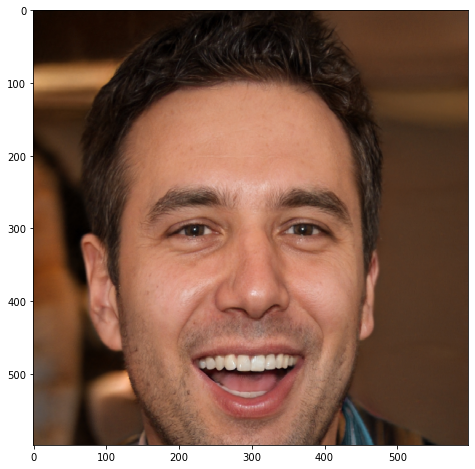

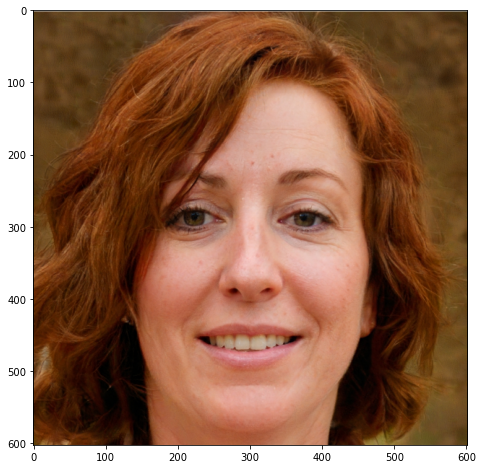

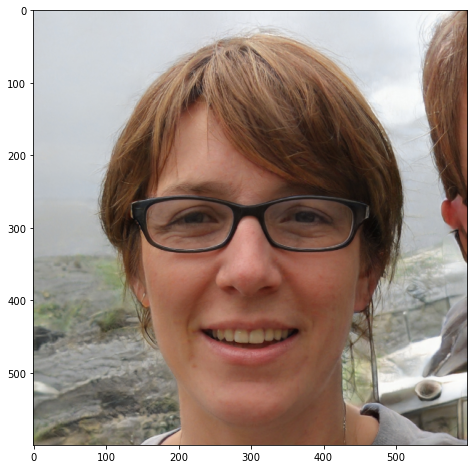

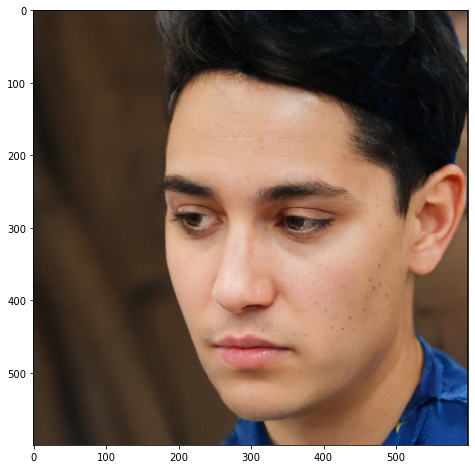

In [5]:
display_images(dataset)

# 3. Preprocessing

In [6]:
# Preprocessing function 
def preprocessing(image):
    
      # convert color to gray 
      image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
      # fitlering 
      image = cv2.medianBlur(image , 1)
      #thresholding
      # ret , image = cv2.threshold(image , 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
      #print('ret =' , ret)
        
      return image

Gray display


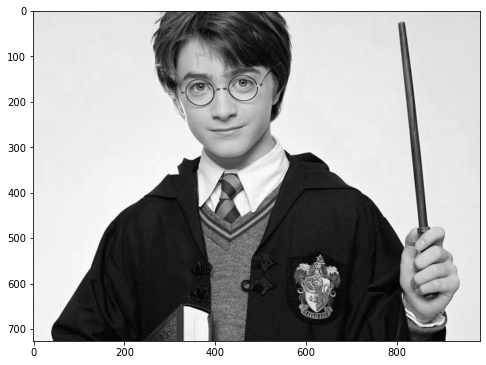

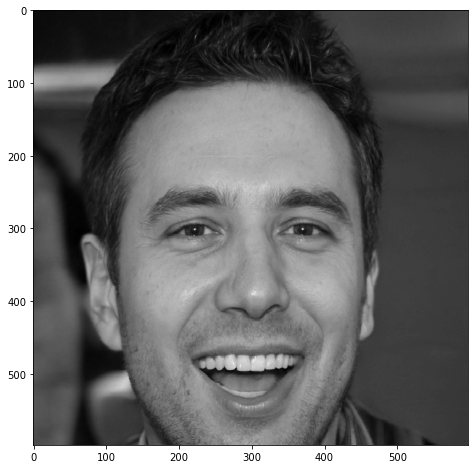

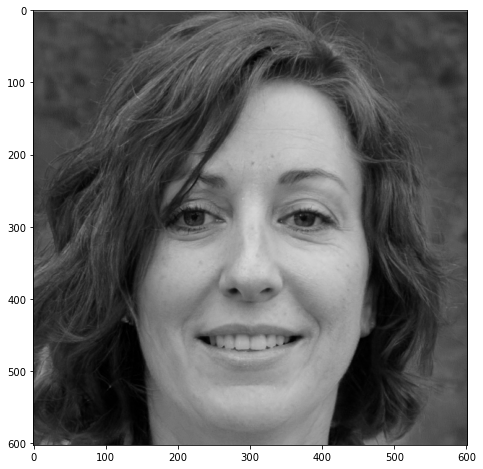

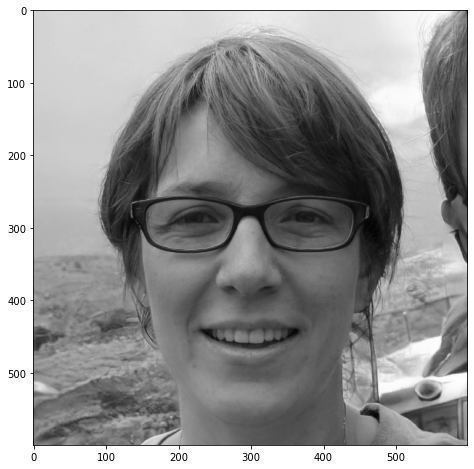

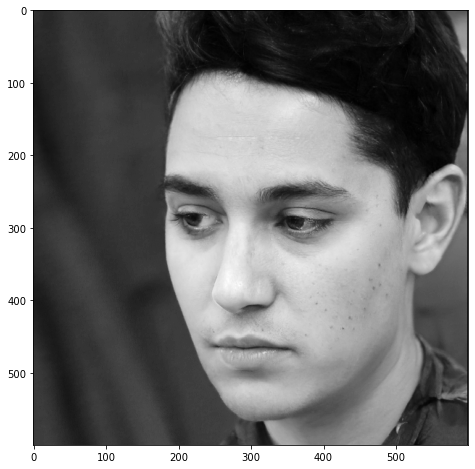

In [7]:
# create a copy of the original dataset  
pre_dataset = dataset.copy()

# preprocessing 
for name , image in pre_dataset.items():
    pre_image = preprocessing(image)
    pre_dataset[name] = pre_image

# Show the preprocessing result 
display_images(pre_dataset , 'gray')

# 4. Face detection model 

In [8]:
# define  a  function to find faces from the preprocessing image 
def model(pre_image):
    
    #Load the required haar-cascade XML classifier file  
    classifier = cv2.CascadeClassifier('haarcascade files\haarcascade_frontalface_default.xml')

    # Apply the face detection method  
    faces = classifier.detectMultiScale(
          pre_image ,
          scaleFactor = 1.1 ,
          minNeighbors = 5 , 
          minSize =(30,30)

      )
    # boundary rectangles for the detected faces (x , y ,w , h)
    return faces

Normal display


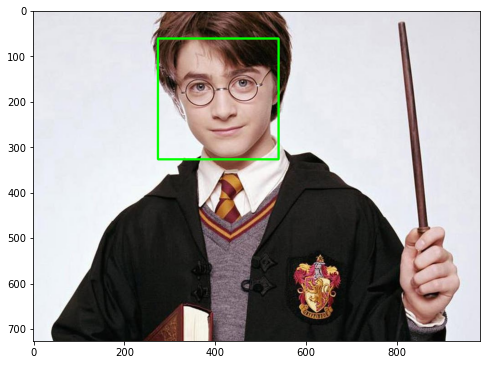

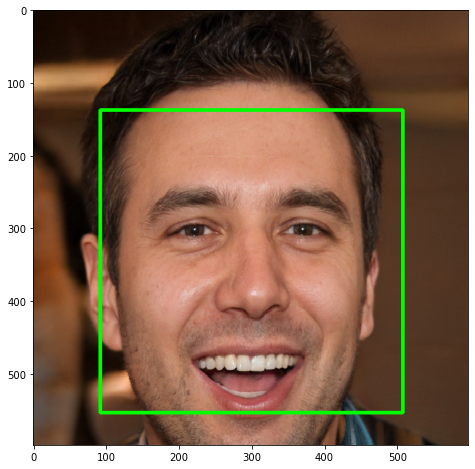

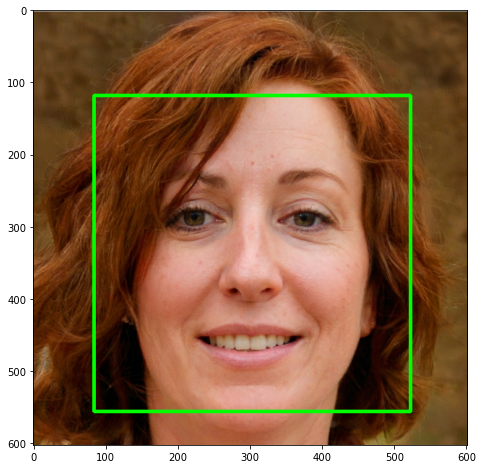

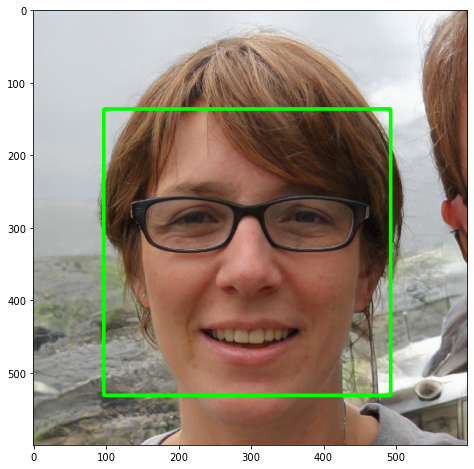

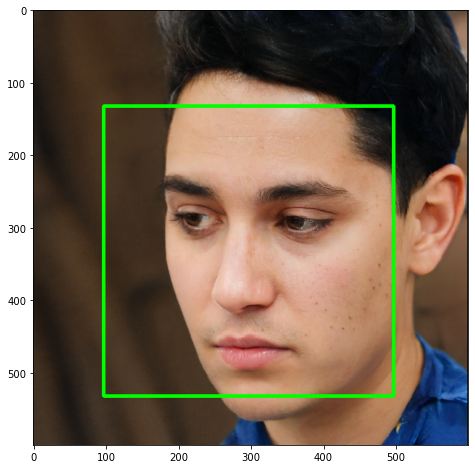

In [9]:
for name , pre_image in pre_dataset.items():
    
  faces = model(pre_image)
  # Draw a rectangle around the faces
  for ( x , y , w ,h) in faces:
     dataset[name] = cv2.rectangle(dataset[name],(x , y) , (x+w , y+h) , (0,255,0) , 3)
     

display_images(dataset)

# 5. Using a webcam

In [10]:
def face_detection(image):

      pre_image = preprocessing(image)
      faces = model(pre_image)
      # Draw a rectangle around the faces  
      for ( x , y , w ,h) in faces:
        image = cv2.rectangle(image,(x , y) , (x+w , y+h) , (0,255,0) , 3)
    
      return image

In [13]:
cap = cv2.VideoCapture(0)  # 0 or -1   for the  main  camera. 1 for the second camera and so on

if not cap.isOpened():
    print('Cannot open the camera. Check it ,please')
    # exit the script
    exit()
    
while True:
  # ret is a boolean variable {True if  frame is read correctly  , false if  frame does not exist}
  ret , frame = cap.read()
  # if  frame is read correctly 
  if ret: 
    # processing algorithms
    df_frame = face_detection(frame)
    
    # display df_frame 
    cv2.imshow('face detection system' , df_frame)
    
  # We wait for the ‘q’ for '' key to be pressed. If it is, we exit the script. else we read the next frame. 
  if cv2.waitKey(5) ==ord('q'):        
    break


#Release the capture
cap.release()    
cv2.destroyAllWindows()

                                                      THE END 